# Entregável 1 - visão computacional

# Bruna Kimura e Vitória Mattos

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240L, 320L)

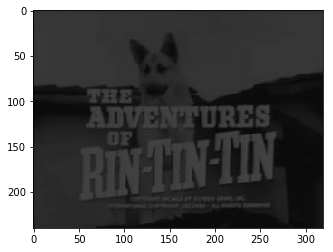

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

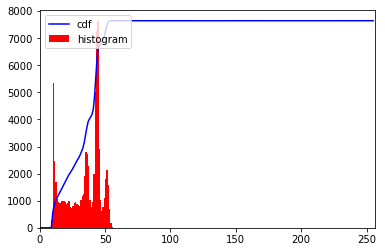

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

### 1. 
##### Não, pois percebemos que a distribuição de cores está concentrada na faixa mais escura, ou seja entre 8 e 58 sendo que a faixa cobre uma faixa de 0 a 255, como demonstraremos mais abaixo na questão 3.

### 2.

##### Primeiro testamos o código pronto para vermos como ficaria a imagem equalizada.


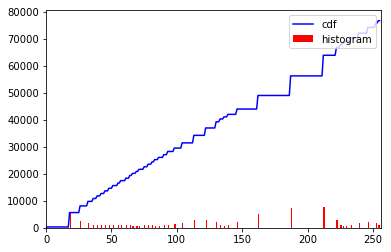

In [8]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized =cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0) #função equalizadora dos dados
#np.ma evita conflitos com dados inválidos ou inexistentes na matriz
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

cdf = np.ma.filled(cdf_m,0).astype('uint8') #preenche a matriz com os dados equalizados

rintin2 = cdf[rintin_gray]

hist2,bins2 = np.histogram(rintin2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()

plt.plot(cdf2, color = 'b')

plt.hist(rintin2.flatten(),256,[0,256], color = 'r')
plt.xlim([rintin2.flatten().min(),256])
plt.legend(('cdf','histogram'), loc = 'upper right')
plt.show()

### 3.
##### Imagem gerada a partir do novo histograma equalizado

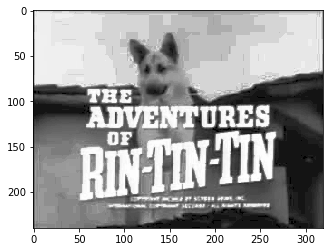

In [9]:
plt.imshow(rintin2, cmap="Greys_r", vmin=0, vmax=255)

### segunda forma de resolver (discutida em aula)

### 2.
##### Neste segundo caso, usamos uma equação da reta para relacionar o valor original com o valor equalizado.

In [10]:
# achar qual e o valor maximo e minimo do histograma

x0=np.amin(rintin)
x=np.amax(rintin)
print(x0,x)

(8, 58)


In [11]:
#coeficiente angular da reta que relaciona a saida(grafico equalizado) com a entrada (dado original)
M = (255-0)/(x-x0)
M

5

In [12]:
equalize = rintin

In [13]:
#achar cada pixel da imagem e troca-la pelo novo valor(usando equacao da reta)

for i in range(len(rintin)):
    for j in range(len(rintin[i])):
        for k in range(len(rintin[i][j])):
            y = M*(rintin[i][j][k]-8)
            equalize[i][j][k]=y

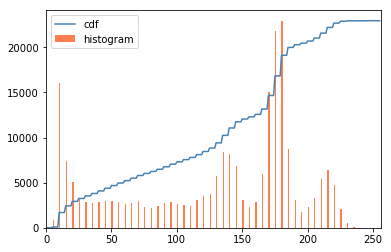

In [14]:
hist,bins = np.histogram(equalize.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_equalize = cdf * hist.max()/ cdf.max()

plt.plot(cdf_equalize, color = 'Steelblue')
plt.hist(equalize.flatten(),256,[0,256], color = 'coral')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

###### Percebemos que a cdf se aproxima de uma reta na diagonal crescente

### 3.
##### Imagem equalizada pelo método discutido em sala

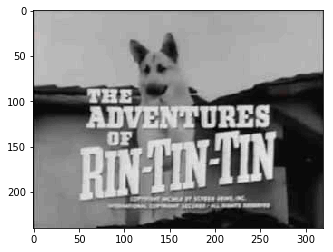

In [16]:
plt.imshow(equalize)

##### Conseguimos ver que neste caso há menos ruidos

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


### 1. 
##### Não, pois apesar das caixas vermelha e azul terem o R (cor vermelha) e B (cor azul) altos respectivamente, a cor branca por sua vez tem todos os RGB altos. Portanto, se selecionasse os pixels com R ou B altos, o programa além de reconhecer as caixas, também reconheceria os pixels brancos.

### 2.


In [26]:
caixinha = cv2.imread("hall_box_battery1.jpg")

#diminuir tamanho da caixa
caixinha = cv2.resize(caixinha,(1024, 768), interpolation = cv2.INTER_CUBIC)

In [18]:
caixinha_rgb = cv2.cvtColor(caixinha, cv2.COLOR_BGR2RGB)

In [19]:
matriz_caixinha = caixinha_rgb

In [20]:
for i in range(len(caixinha_rgb)):
    for j in range(len(caixinha_rgb[i])):
        #pelo codigo da aula um, percebos q 0, 1 e 2 coresponde respctivamente a RGB.
        vermelho = caixinha_rgb[i][j][0]
        verde = caixinha_rgb[i][j][1]
        azul = caixinha_rgb[i][j][2]
        
        #pintar todos os pixels da imagem de preto
        matriz_caixinha[i][j][0] = 0
        matriz_caixinha[i][j][1] = 0
        matriz_caixinha[i][j][2] = 0        
        
        
# Como vimos no item 1, para especificar que queremos somente a caixa vermelha temos que dizer que ela tem R alto e GB baixo.             
        if vermelho > 150:
            if verde < 140:
                if azul < 140:
                    matriz_caixinha[i][j][0] = 255
                    matriz_caixinha[i][j][1] = 255
                    matriz_caixinha[i][j][2] = 255


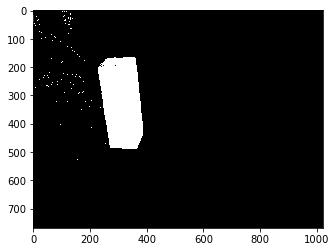

In [21]:
plt.imshow(matriz_caixinha)

##### Aplicando um filtro para tirar o ruido

In [22]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(matriz_caixinha, cv2.MORPH_OPEN, kernel)


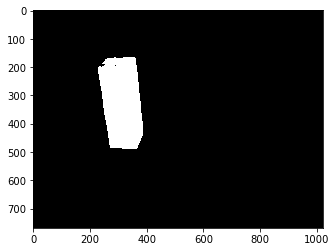

In [23]:
plt.imshow(opening)

In [24]:
opening2 = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)

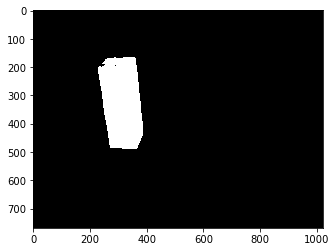

In [25]:
plt.imshow(opening2)

##### Aplicamos novamente, porém não obtivemos um resultado muito melhor que o anterior.